In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [536]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [537]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

df = df.dropna(subset=['kmDriven'])
df['kmDriven'] = df['kmDriven'].str.replace('km', '').str.replace(',', '').astype(float)
df['AskPrice'] = df['AskPrice'].str.replace('₹', '').str.replace(',', '').astype(float)
df = df.drop(columns=['AdditionInfo'])
df = df.drop(columns=['PostedDate'])
df['Transmission'] = label_encoder1.fit_transform(df['Transmission']).astype(float)
df['Owner'] = label_encoder2.fit_transform(df['Owner']).astype(float)
df['FuelType'] = label_encoder3.fit_transform(df['FuelType']).astype(float)
df['Age'] = df['Age'].astype(float)
df['kmDriven'] = df.groupby('Brand')['kmDriven'].transform(lambda x: x.fillna(x.median()))

df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,23.0,98000.0,1.0,1.0,2.0,195000.0
1,Toyota,Innova,2009,15.0,190000.0,1.0,1.0,0.0,375000.0
2,Volkswagen,VentoTest,2010,14.0,77246.0,1.0,0.0,0.0,184999.0
3,Maruti Suzuki,Swift,2017,7.0,83500.0,1.0,1.0,0.0,565000.0
4,Maruti Suzuki,Baleno,2019,5.0,45000.0,0.0,0.0,2.0,685000.0


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Year          9535 non-null   int64  
 3   Age           9535 non-null   float64
 4   kmDriven      9535 non-null   float64
 5   Transmission  9535 non-null   float64
 6   Owner         9535 non-null   float64
 7   FuelType      9535 non-null   float64
 8   AskPrice      9535 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 744.9+ KB


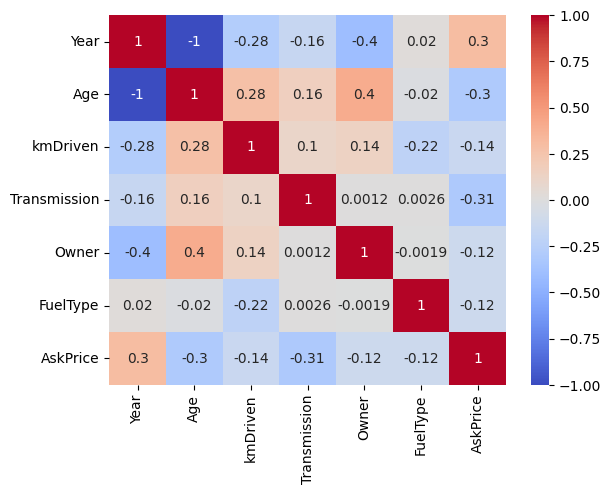

In [539]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [540]:
df = df.drop(columns=['Year'])

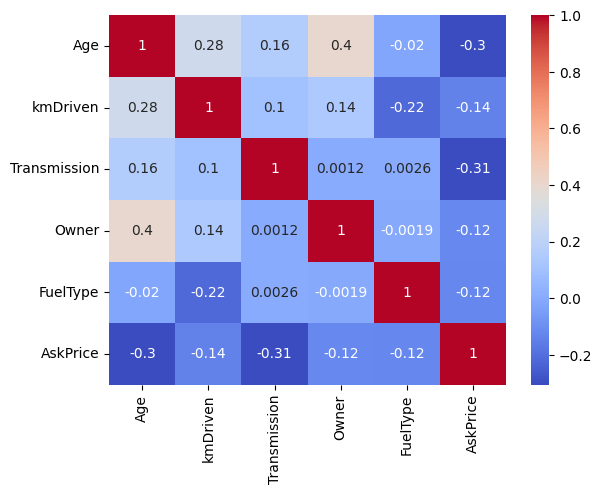

In [541]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

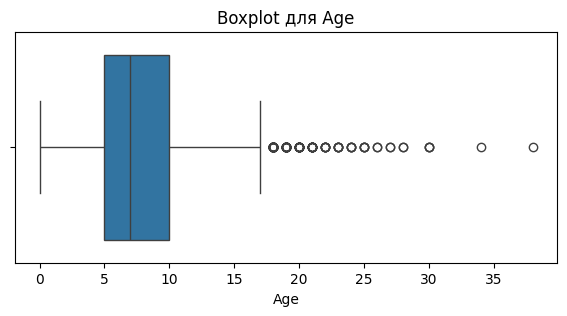

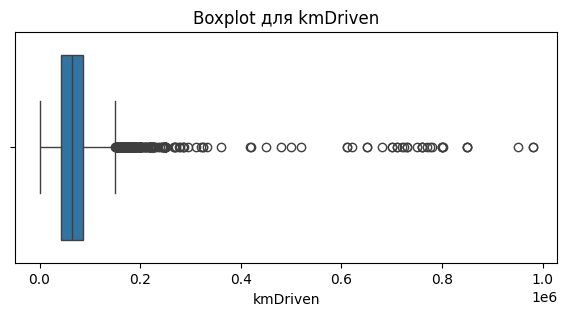

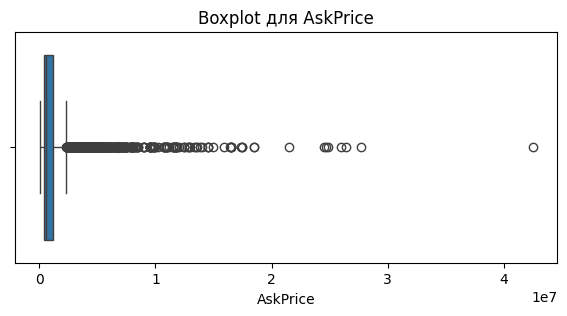

In [542]:
selected_columns = ['Age', 'kmDriven', 'AskPrice'] 

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

if not selected_columns:
    selected_columns = numeric_columns.columns

for column in selected_columns:
    if column in numeric_columns.columns:
        Q1 = numeric_columns[column].quantile(0.25)
        Q3 = numeric_columns[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = (numeric_columns[column] < lower_bound) | (numeric_columns[column] > upper_bound)

        plt.figure(figsize=(7, 3))
        sns.boxplot(x=numeric_columns[column])
        plt.title(f"Boxplot для {column}")
        plt.show()
    else:
        print(f"Колонка {column} не найдена среди числовых данных.")

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Age           9535 non-null   float64
 3   kmDriven      9535 non-null   float64
 4   Transmission  9535 non-null   float64
 5   Owner         9535 non-null   float64
 6   FuelType      9535 non-null   float64
 7   AskPrice      9535 non-null   float64
dtypes: float64(6), object(2)
memory usage: 670.4+ KB


In [544]:
for column in ['Age', 'kmDriven', 'AskPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Количество выбросов в {column} перед обработкой: {outliers.sum()}")

Количество выбросов в Age перед обработкой: 135
Количество выбросов в kmDriven перед обработкой: 353
Количество выбросов в AskPrice перед обработкой: 867


In [545]:
for column in ['Age', 'kmDriven', 'AskPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), median_value)

In [546]:
for column in ['Age', 'kmDriven', 'AskPrice']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"Количество выбросов в {column} после обработки: {outliers.sum()}")

Количество выбросов в Age после обработки: 0
Количество выбросов в kmDriven после обработки: 115
Количество выбросов в AskPrice после обработки: 655


In [547]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

if numeric_df.isnull().any().any():
    numeric_df = numeric_df.fillna(0)  

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print(vif_data)

        Feature       VIF
0           Age  6.712562
1      kmDriven  6.493103
2  Transmission  2.022408
3         Owner  2.387859
4      FuelType  1.853068
5      AskPrice  2.107027


In [548]:
df.head()

,Brand,model,Age,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,7.0,98000.0,1.0,1.0,2.0,195000.0
1,Toyota,Innova,15.0,65000.0,1.0,1.0,0.0,375000.0
2,Volkswagen,VentoTest,14.0,77246.0,1.0,0.0,0.0,184999.0
3,Maruti Suzuki,Swift,7.0,83500.0,1.0,1.0,0.0,565000.0
4,Maruti Suzuki,Baleno,5.0,45000.0,0.0,0.0,2.0,685000.0


In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9535 non-null   object 
 1   model         9535 non-null   object 
 2   Age           9535 non-null   float64
 3   kmDriven      9535 non-null   float64
 4   Transmission  9535 non-null   float64
 5   Owner         9535 non-null   float64
 6   FuelType      9535 non-null   float64
 7   AskPrice      9535 non-null   float64
dtypes: float64(6), object(2)
memory usage: 670.4+ KB


In [550]:
df = pd.get_dummies(df, columns=['Brand', 'model'])

In [551]:
copied_df1 = df.copy(deep=True)
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
numerical_features1 = ['Age', 'kmDriven', 'AskPrice']
copied_df1[numerical_features1] = scaler1.fit_transform(copied_df1[numerical_features1])

In [552]:
copied_df2 = df.copy(deep=True)
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
numerical_features2 = ['Age', 'kmDriven', 'AskPrice']
copied_df2[numerical_features2] = scaler2.fit_transform(copied_df2[numerical_features2])

In [553]:
copied_df1.head()

,Age,kmDriven,Transmission,Owner,FuelType,AskPrice,Brand_Ambassador,Brand_Ashok,Brand_Aston Martin,Brand_Audi,...,model_Zen Estilo,model_Zen-Estilo,model_Zest,model_i10,model_i20,model_i20 Active,model_i20 N Line,model_maruti-suzuki-brezza,model_maruti-suzuki-dzire,model_tata-punch
0,0.411765,0.653333,1.0,1.0,2.0,0.078775,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.882353,0.433333,1.0,1.0,0.0,0.157549,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.823529,0.514973,1.0,0.0,0.0,0.074398,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.411765,0.556667,1.0,1.0,0.0,0.240700,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.294118,0.300000,0.0,0.0,2.0,0.293217,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [554]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = copied_df1.drop(columns=['AskPrice'])
y = copied_df1['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 6903068418697228.0
R^2 Score: -1.652208321471851e+17


In [555]:
from sklearn.linear_model import Lasso

X = copied_df1.drop(columns=['AskPrice'])  
y = copied_df1['AskPrice'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=0.1, max_iter=10000)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.04179715136285073
R^2 Score: -0.0003899296213740744


In [556]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = copied_df1.drop(columns=['AskPrice'])  
y = copied_df1['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0, max_iter=10000)  
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.015252164094062161
R^2 Score: 0.6349485343588777
